In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np;
import pandas as pd;
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [34]:
df = pd.read_csv('./parkinsons.data');

In [35]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [36]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [37]:
df.shape

(195, 24)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [39]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [40]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [41]:
df.duplicated().sum()

0

In [42]:
df["status"].value_counts() 

status
1    147
0     48
Name: count, dtype: int64

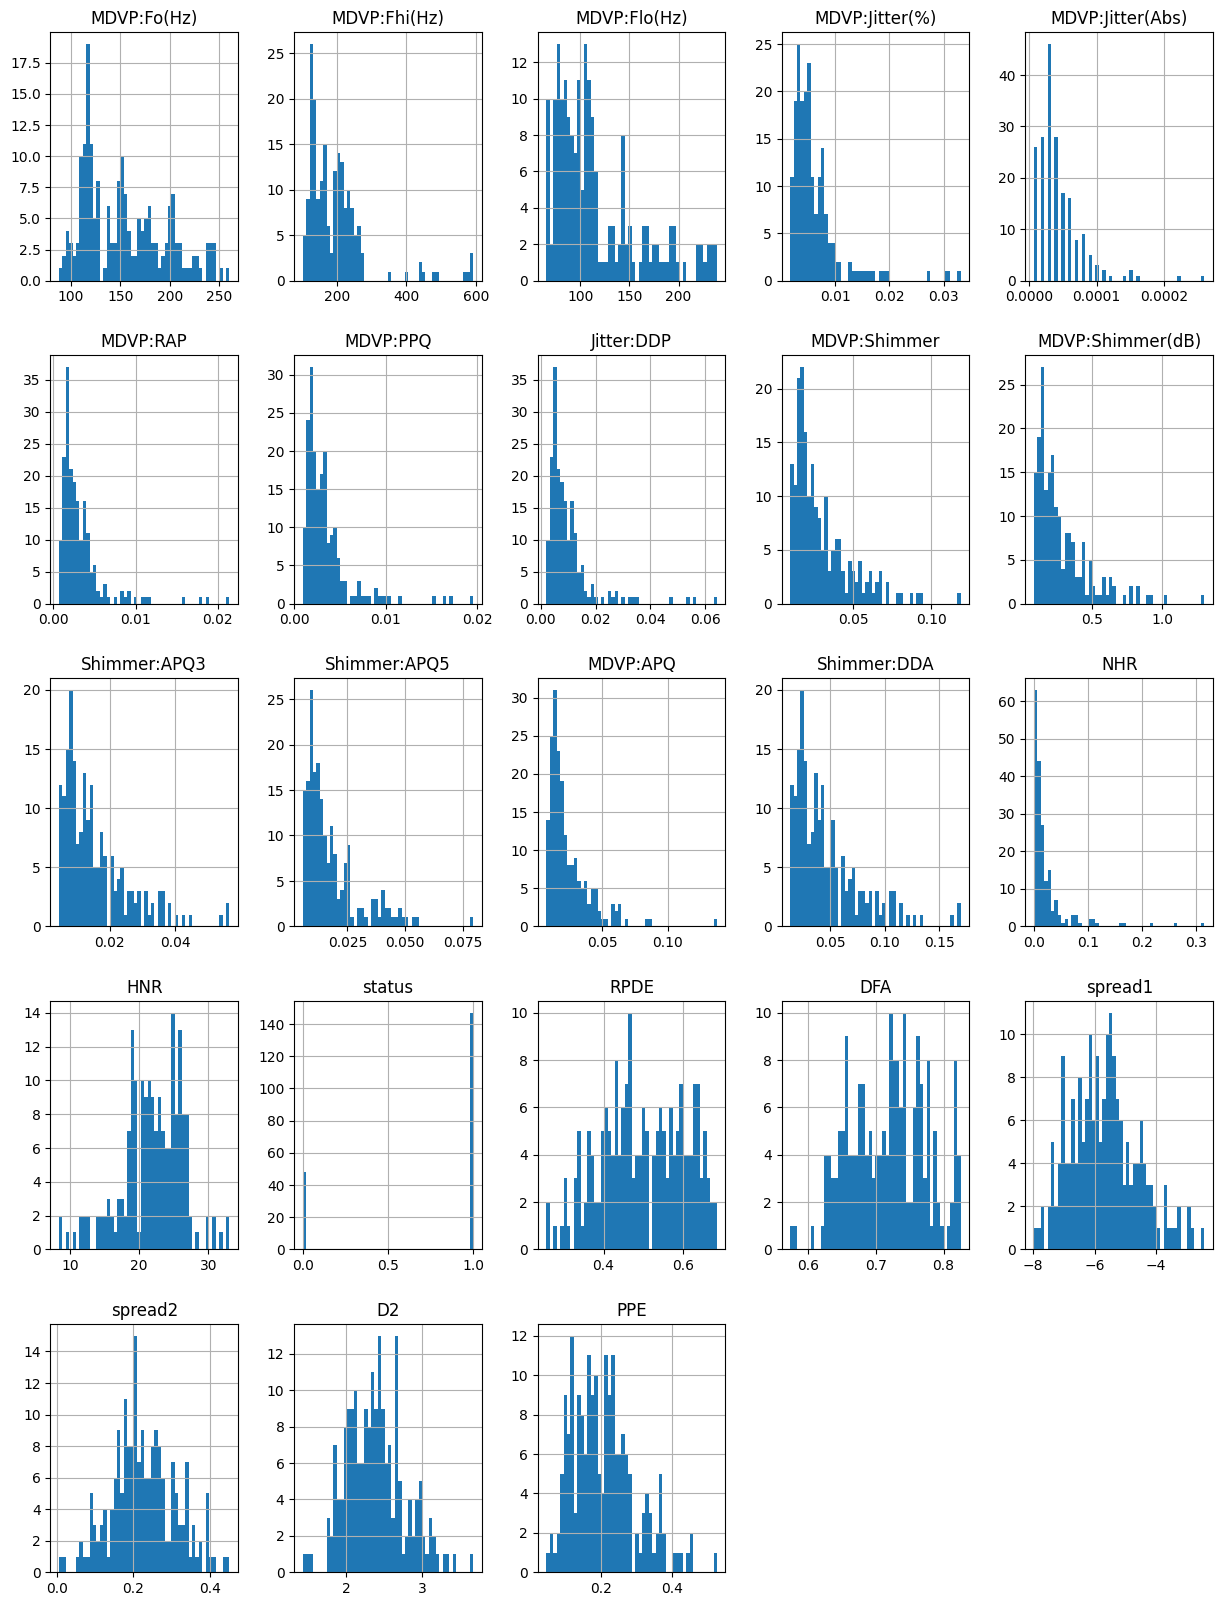

In [43]:
df.hist(bins=50,figsize=(15,20))
plt.show(block=False)

[[0.18430827 0.11259173 0.05481479 ... 0.58576513 0.39066128 0.4973096 ]
 [0.19832685 0.09493044 0.2783228  ... 0.74133704 0.47314522 0.67132602]
 [0.16503854 0.05912816 0.26528838 ... 0.68637091 0.40881938 0.59668246]
 ...
 [0.50273036 0.28141298 0.05072714 ... 0.34257652 0.55896743 0.18057983]
 [0.6428929  0.60180655 0.05427936 ... 0.45288473 0.31822198 0.16313677]
 [0.73327434 0.32279413 0.07194837 ... 0.41509481 0.50367281 0.21545975]]


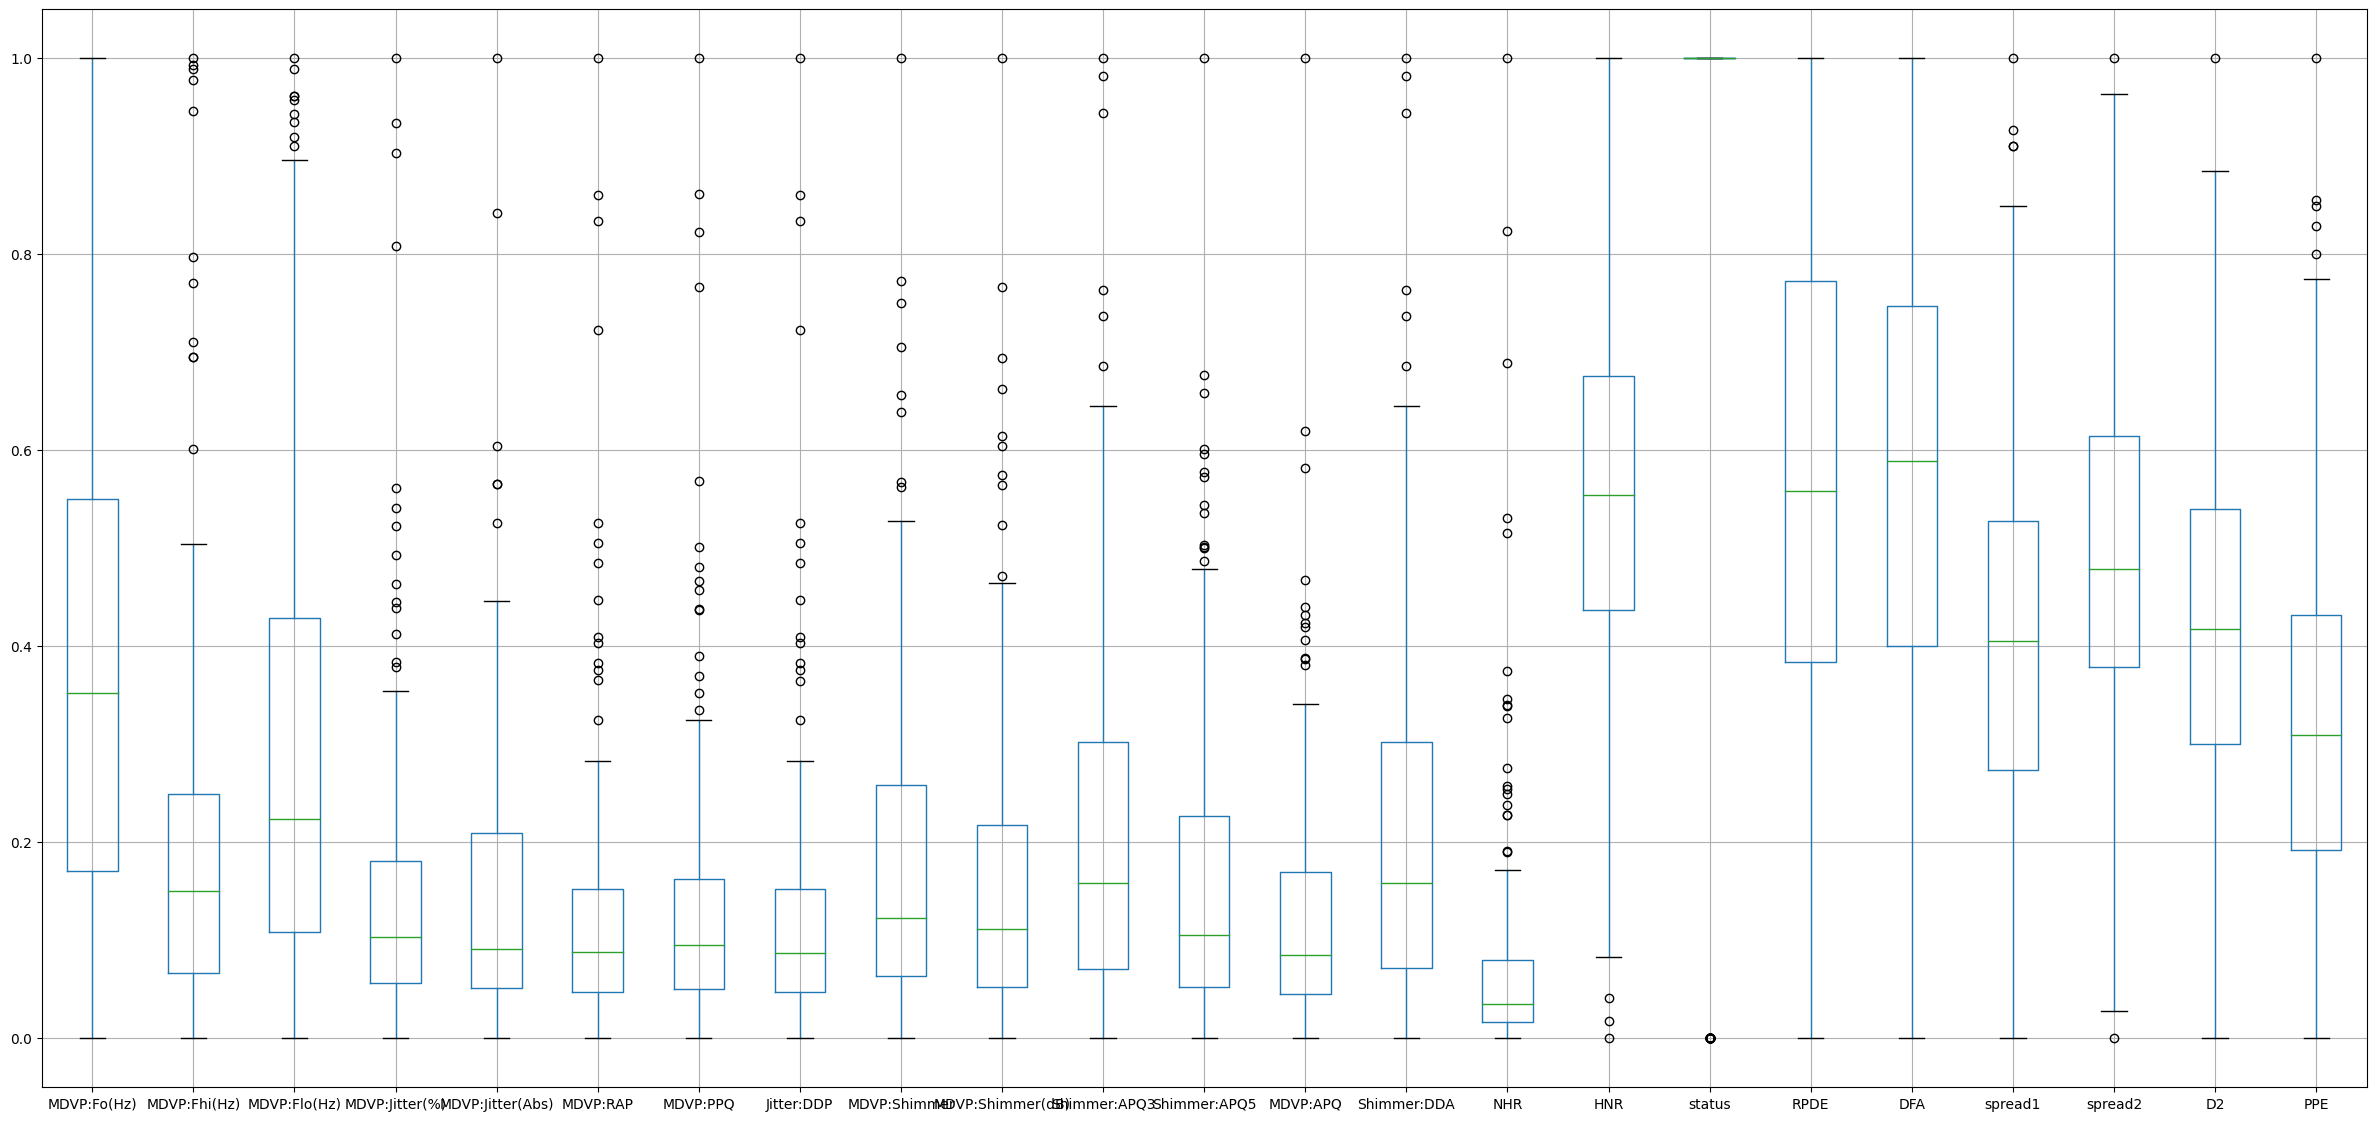

In [57]:
minmax = MinMaxScaler()
data_boxplot = df.drop(['name'],axis=1).values
data_boxplot = minmax.fit_transform(data_boxplot)
boxplot = pd.DataFrame(data_boxplot, columns = df.drop(['name'],axis=1).columns)
boxplot.boxplot(figsize=(30,14))
plt.show(block=False)

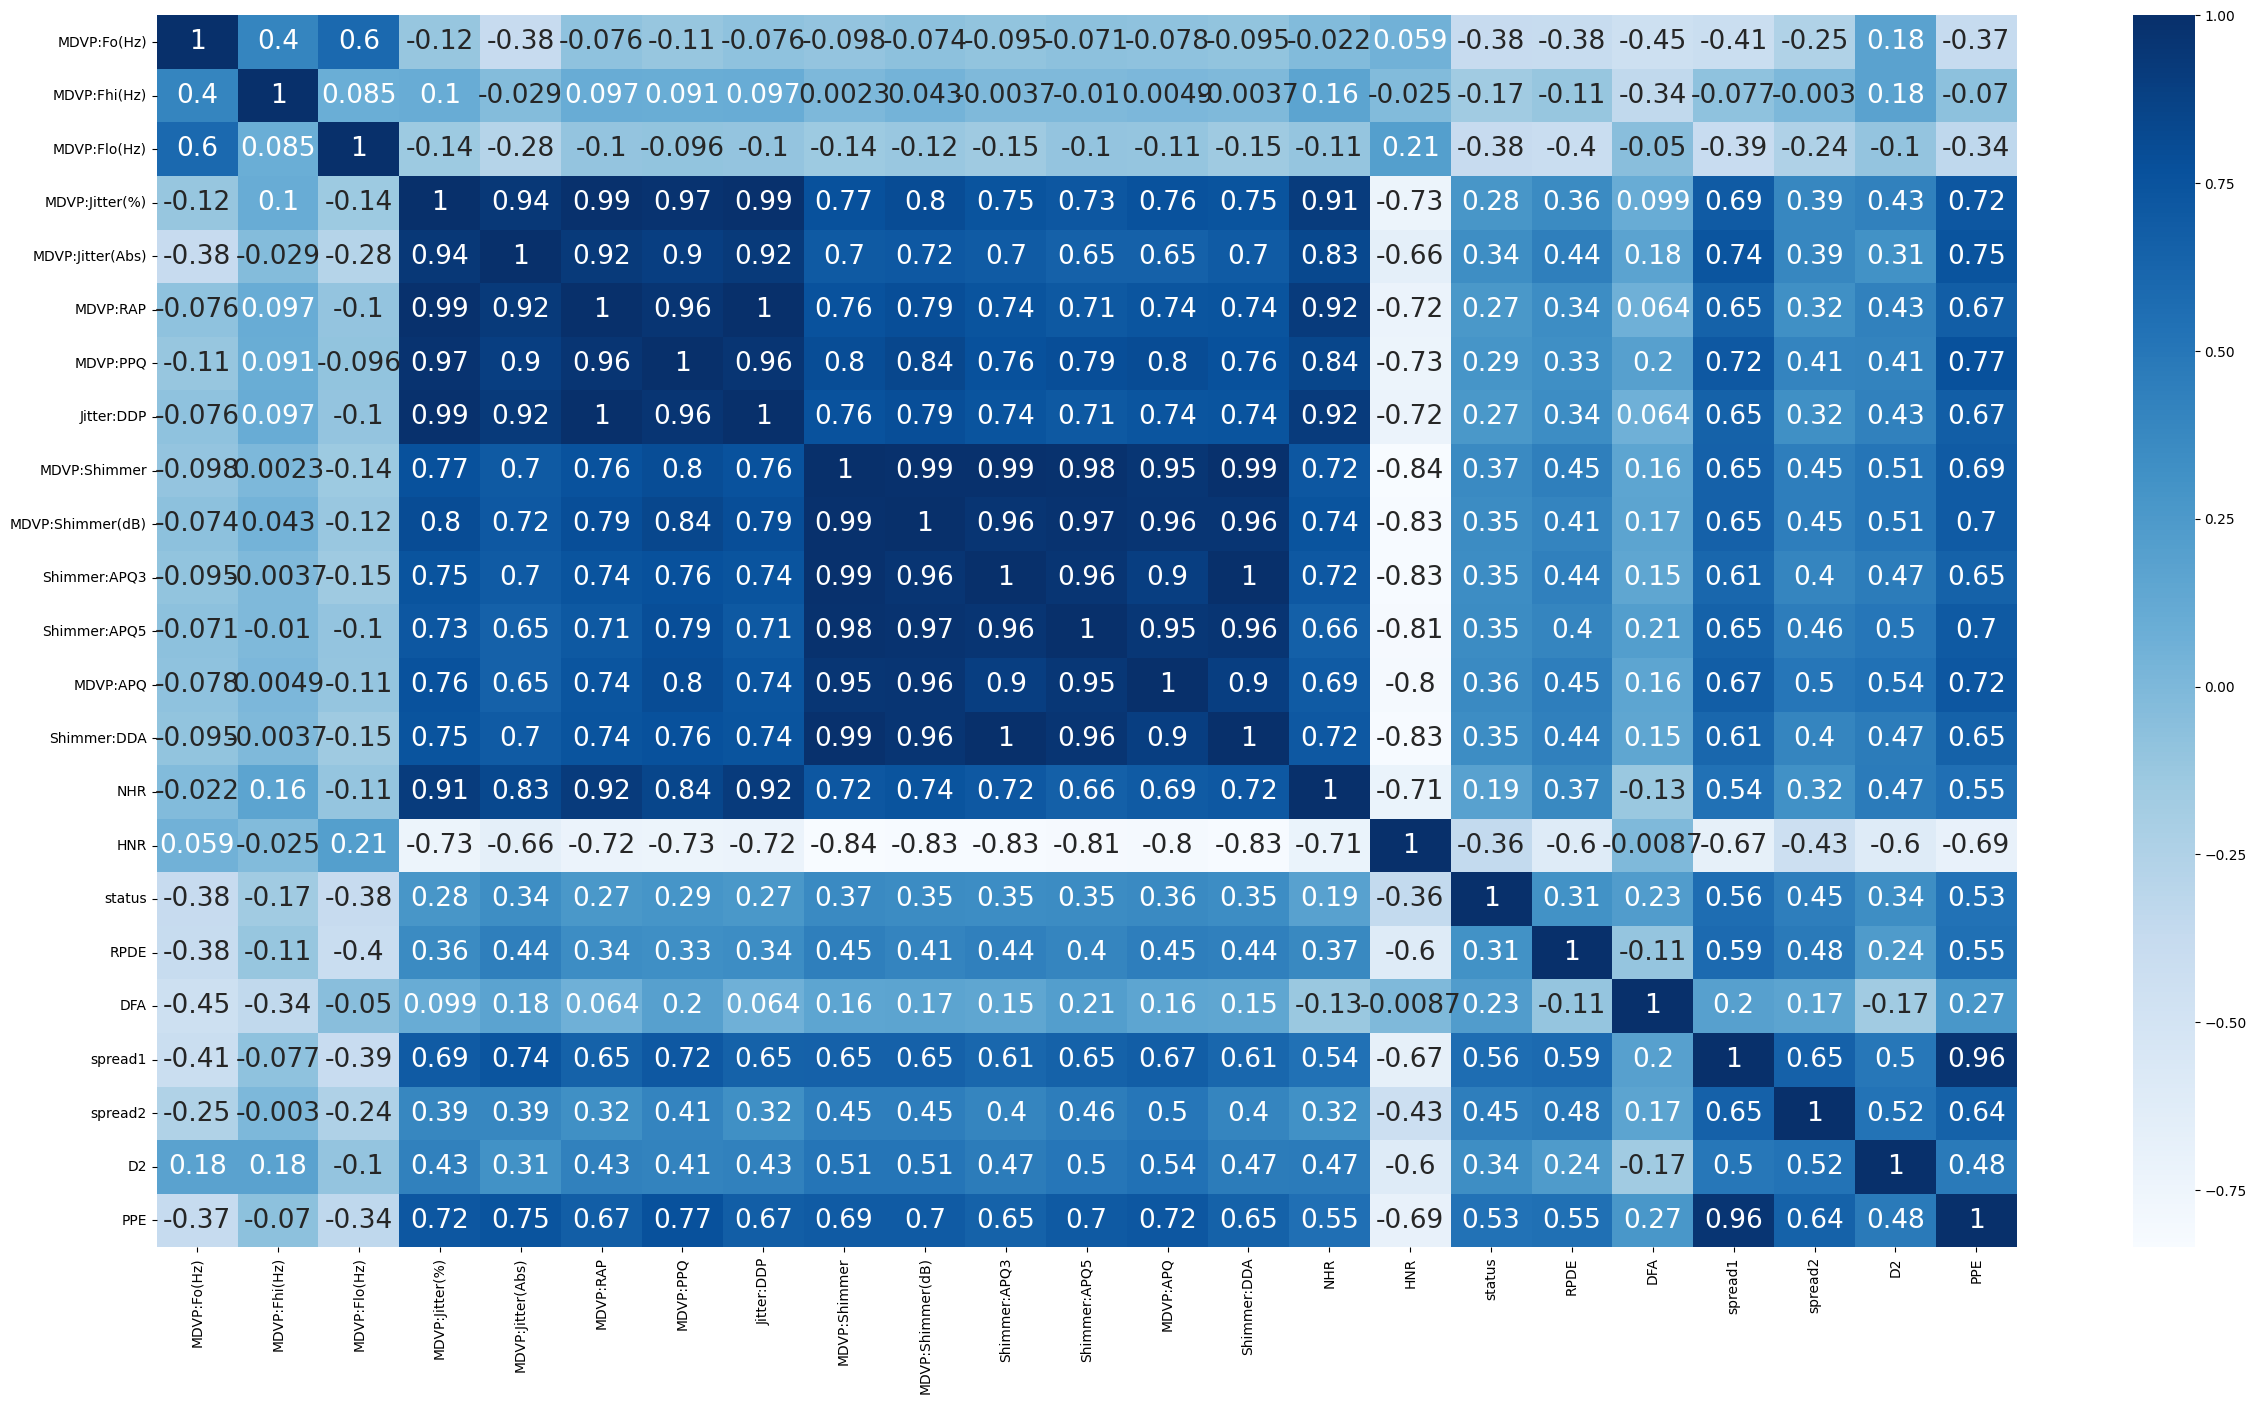

In [45]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(30, 16))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', annot_kws={'size': 19})
plt.show()


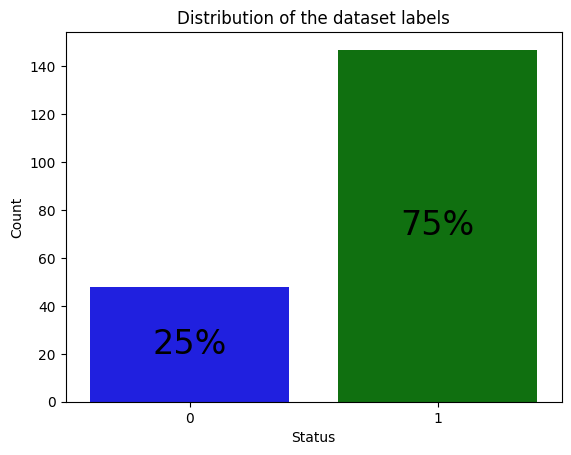

In [46]:
fig = sns.countplot(df, x='status', palette=['blue', 'green'])

total = len(df['status'])

for p in fig.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='center', va='center', color='Black', fontsize=24)
    
fig.set_xlabel('Status')
fig.set_ylabel('Count')

plt.title('Distribution of the dataset labels')
plt.show()

In [47]:
x=df.drop(['name','status'],axis=1)
y=df["status"]

In [49]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [50]:
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)
smote_data = pd.concat([x_smote, y_smote], axis=1)
smote_data.shape

(294, 23)

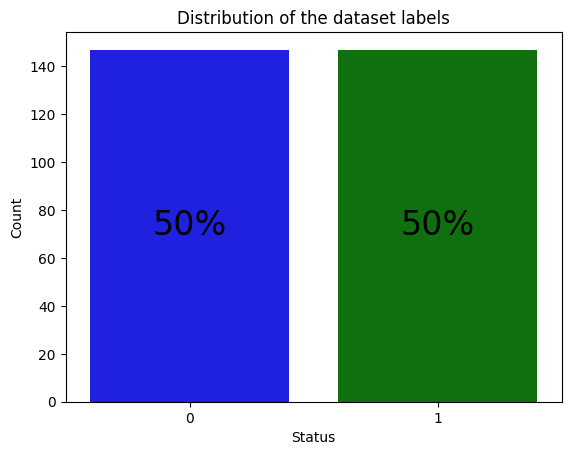

In [51]:
fig = sns.countplot(smote_data, x='status', palette=['blue', 'green'])

total = len(smote_data['status'])

for p in fig.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='center', va='center', color='Black', fontsize=24)
    
fig.set_xlabel('Status')
fig.set_ylabel('Count')

plt.title('Distribution of the dataset labels')
plt.show()

In [52]:
x=df.drop(['name','status'],axis=1).values
y=df["status"].values

In [53]:
print(x[0])

[ 1.199920e+02  1.573020e+02  7.499700e+01  7.840000e-03  7.000000e-05
  3.700000e-03  5.540000e-03  1.109000e-02  4.374000e-02  4.260000e-01
  2.182000e-02  3.130000e-02  2.971000e-02  6.545000e-02  2.211000e-02
  2.103300e+01  4.147830e-01  8.152850e-01 -4.813031e+00  2.664820e-01
  2.301442e+00  2.846540e-01]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(x_smote, y_smote,
                                                                            test_size=0.2, random_state=42)

In [23]:
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [24]:
X_smote_train_scaled = minmax.fit_transform(X_smote_train)
X_smote_test_scaled = minmax.transform(X_smote_test)

In [25]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) : 
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(f" ❖ Testing Accuracy Score :{round(accuracy_score(Ytest, Ypredicted) * 100,2)}")
    print(' • Precision Score is :', round(precision_score(Ytest, Ypredicted) * 100,2))
    print(' • Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    print(' • F1-Score Score is :', round(f1_score(Ytest, Ypredicted) * 100,2))
    print('-'*80)
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels',y = 1.05, fontsize=20, fontfamily='Times New Roman')
    plt.ylabel('True Labels', labelpad=25, fontsize=20, fontfamily='Times New Roman')
    plt.show()
    print('-'*80)
    return model_score

In [26]:
models = [
    LogisticRegression(),
    SVC(kernel='linear'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier()
]



 • Training Accuracy Score :  85.26
 • Cross Validation Score : 83.87
 ❖ Testing Accuracy Score :89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


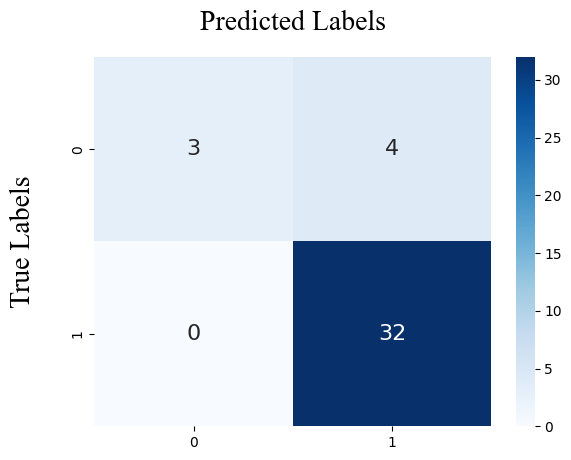

--------------------------------------------------------------------------------

 • Training Accuracy Score :  88.46
 • Cross Validation Score : 87.67
 ❖ Testing Accuracy Score :89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


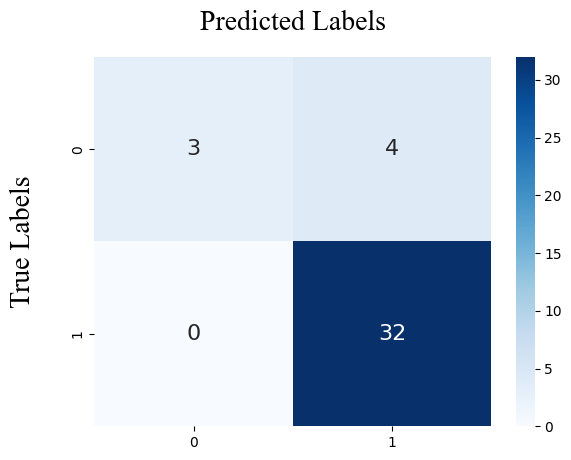

--------------------------------------------------------------------------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 85.29
 ❖ Testing Accuracy Score :89.74
 • Precision Score is : 91.18
 • Recall Score is : 96.88
 • F1-Score Score is : 93.94
--------------------------------------------------------------------------------


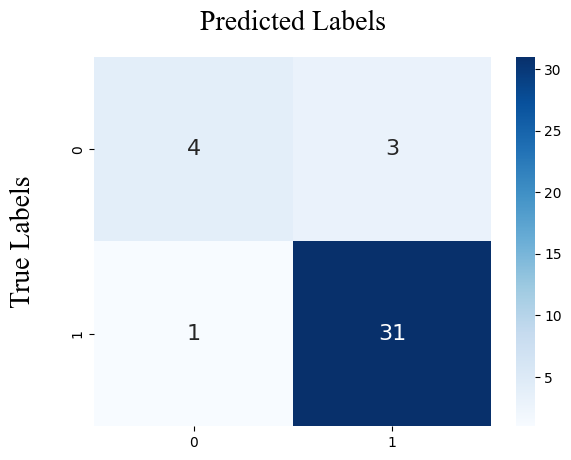

--------------------------------------------------------------------------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 90.96
 ❖ Testing Accuracy Score :89.74
 • Precision Score is : 93.75
 • Recall Score is : 93.75
 • F1-Score Score is : 93.75
--------------------------------------------------------------------------------


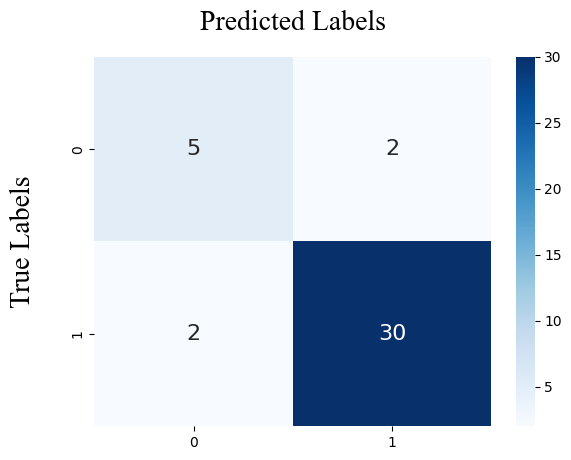

--------------------------------------------------------------------------------

 • Training Accuracy Score :  96.79
 • Cross Validation Score : 89.79
 ❖ Testing Accuracy Score :94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


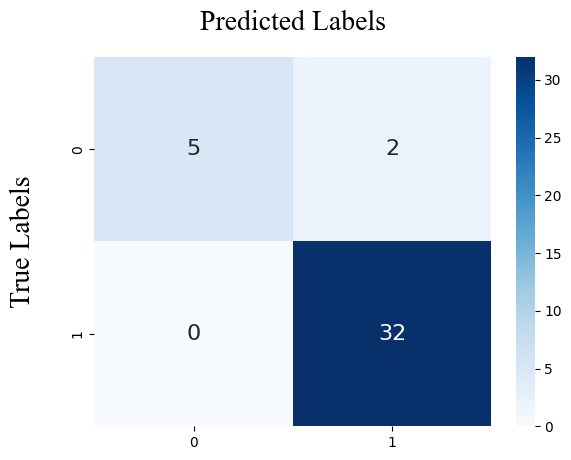

--------------------------------------------------------------------------------
Best Model: RandomForestClassifier()
Best test score :  89.79


In [27]:
#Running Models on scaled unbalanced dataset 

best_model = None
best_score = 0

# Iterate through the models and evaluate their performance
for model in models:
    # Assuming Xtrain, Xtest, Ytrain, Ytest are defined
    score =  Evaluate_Performance(model, X_train_scaled, X_test_scaled, y_train, y_test)
    
    if score > best_score:
        best_score = score
        best_model = model

print("Best Model:", best_model)
print("Best test score : ",round(score*100,2))





 • Training Accuracy Score :  80.0
 • Cross Validation Score : 77.46
 ❖ Testing Accuracy Score :84.75
 • Precision Score is : 85.71
 • Recall Score is : 82.76
 • F1-Score Score is : 84.21
--------------------------------------------------------------------------------


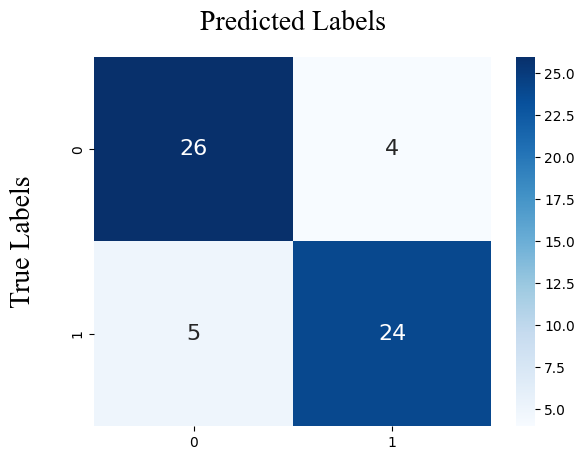

--------------------------------------------------------------------------------

 • Training Accuracy Score :  83.4
 • Cross Validation Score : 79.22
 ❖ Testing Accuracy Score :88.14
 • Precision Score is : 89.29
 • Recall Score is : 86.21
 • F1-Score Score is : 87.72
--------------------------------------------------------------------------------


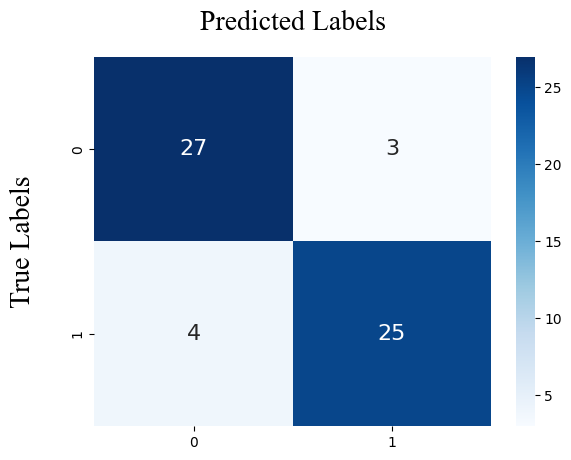

--------------------------------------------------------------------------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 88.93
 ❖ Testing Accuracy Score :98.31
 • Precision Score is : 96.67
 • Recall Score is : 100.0
 • F1-Score Score is : 98.31
--------------------------------------------------------------------------------


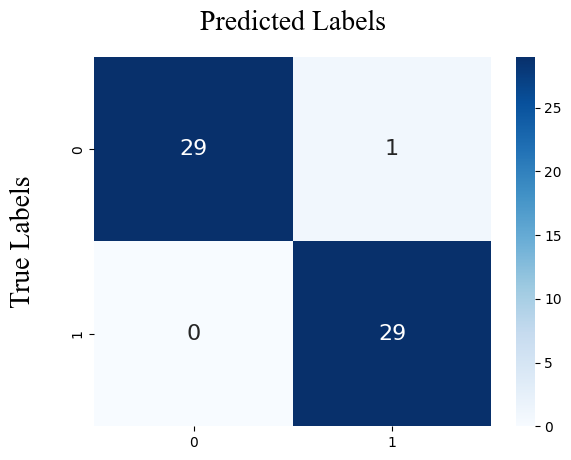

--------------------------------------------------------------------------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 92.32
 ❖ Testing Accuracy Score :100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0
--------------------------------------------------------------------------------


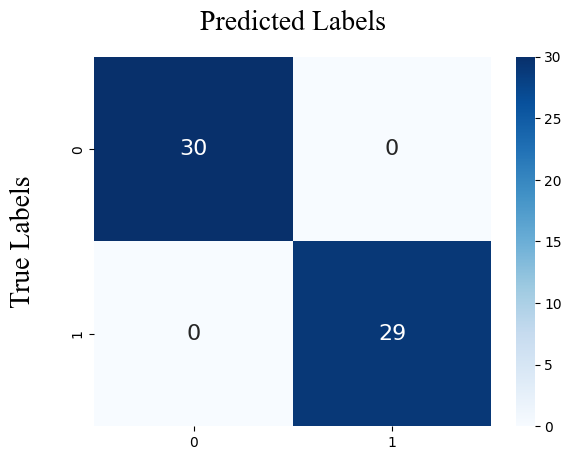

--------------------------------------------------------------------------------

 • Training Accuracy Score :  94.47
 • Cross Validation Score : 91.45
 ❖ Testing Accuracy Score :96.61
 • Precision Score is : 96.55
 • Recall Score is : 96.55
 • F1-Score Score is : 96.55
--------------------------------------------------------------------------------


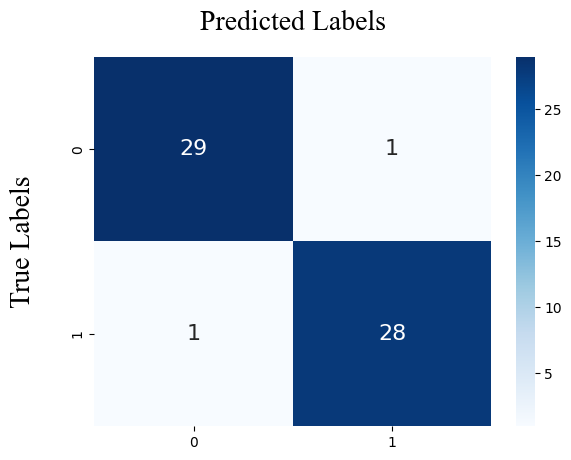

--------------------------------------------------------------------------------
Best Model: RandomForestClassifier()
Best test score :  91.45


In [28]:

for model in models:
    score =  Evaluate_Performance(model,X_smote_train_scaled, X_smote_test_scaled,y_smote_train,y_smote_test)
    
    if score > best_score:
        best_score = score
        best_model = model

print("Best Model:", best_model)
print("Best test score : ",round(score*100,2))


In [29]:
print(f"Accuracy : {accuracy_score(best_model.predict(X_smote_test_scaled),y_smote_test)}");

Accuracy : 1.0


In [30]:
import joblib

In [31]:
joblib.dump(best_model,'parkinson_model.joblib')
joblib.dump(minmax,'parkinsonScaler.joblib')


['parkinsonScaler.joblib']